# Demo Simulation Analysis

This is a demo of the simulator. The simulation collects 20 K samples based on host write requests. This simulation runs a random writes of pages, 4 KiB each.

There are four NAND cells simulated. All NANDs have the following common features:

* page size:               4096 [Bytes] (4 [KiB]);
* pages per block:         128 [#];
* total blocks;            256 [#];
* total pages;             32768 [#];
* capacity:                128 [MiB];
* page write time:         40 [µs];
* page read time:          20 [µs];
* block erase time:        1500 [µs];
* max bandwidth read:      195.31 [MiB\s] (theoretical);
* max bandwidth write:     97.66 [MiB\s] (theoretical).

Then, every NAND has different garbage collector policies:

* **base** no garbage collection. If a block is full during a write, just find the first available page in a different block;
* **basegc** simple garbage collector that cleans a block when at least 10% of its pages are dirty and only if at least 500 µseconds are elapsed after the last gc execution;
* **wpgc** simple garbage collector that cleans a block when at least 40% of its pages are dirty and only if at least 0.5 seconds are elapsed after the last gc execution. If a block is full during a write, the block is modified in-memory and erased;
* **wpnegc** simple garbage collector that cleans a block when at least 40% of its pages are dirty and only if at least 0.5 seconds are elapsed after the last gc execution. If a block is full during a write, the block is modified in-memory and written in a new free block (if available). The original block is left dirty or empty (the gc will clean it).


- - -
For reference: [iPython Notebook markdown](https://daringfireball.net/projects/markdown/syntax).

In [ ]:
# initialize
%matplotlib inline
from simulator import analysis_helper as ah

# read the simulation data
sim_names = ("base", "basegc", "wpgc", "wpnegc")
data = ah.load_data(sim_names, "../RESULTS/demo/")

## Page written host vs disk
This plot is in logaritmic scale and compares the host write requests (_x axis_) versus the effective disk writes (_y axis_). Ideally it should be linear: every host request correspond to a single disk write. Yet, due to the garbage collection or disk errors (_ie: disk is full_) the behaviour may change. 

In this simulation the **basegc** disk writes more than requested due to heavy garbage collections.

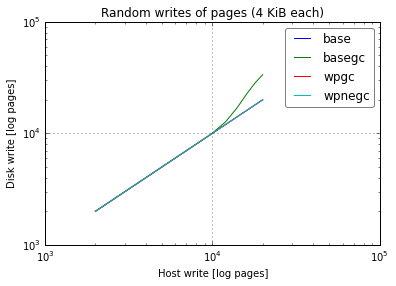

In [ ]:
ah.plot_disk_writes(sim_names, data)

## Host write time

This plot shows how much time is elapsed respect to the host write requests.

In this simulation the **basegc** disk needs rougly 3 times more than the other disks to write the same amount of data. Again, this is due to the heavy garbage collection: it runs too much, leaving the host waiting.

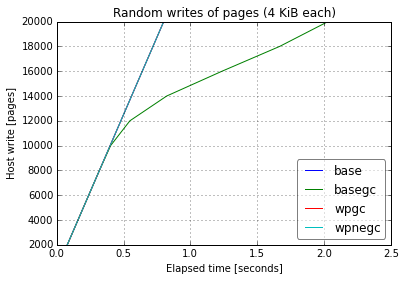

In [3]:
ah.plot_disk_write_time(sim_names, data)

## IOPS over written pages

This plot shows the IOPS as seen by the host over the write requests.

In this simulation the **basegc** disk has a fall after 10K page requests.

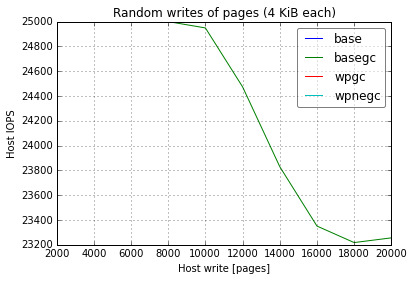

In [4]:
ah.plot_iops(sim_names, data)

## Amplification factor over written pages

This plot shows the amplification factor as seen by the host over the write requests. The amplification factor is defined as:
$$ A_f = \frac{W_s}{W_h} $$

Where:

* $W_s$ is the number of pages written actually by the disk;
* $W_h$ is the number of pages the host requests to write.

As already pointed out, the **basegc** writes more than requested, so it has an amplification factor greater than 1.

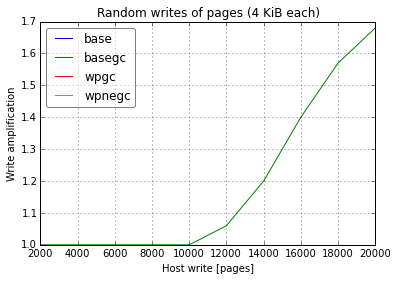

In [5]:
ah.plot_disk_af(sim_names, data)

## Write bandwidth over written pages

This plot shows the write bandwidth as seen by the host over the write requests.

In this simulation the **basegc** disk has a fall after 10K page requests (consistent with the IOPS and amplification factor plots).

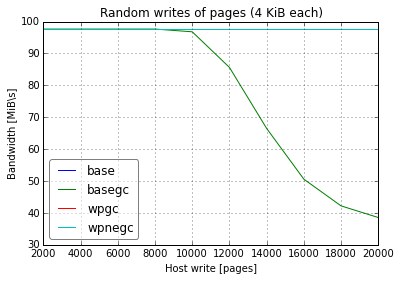

In [6]:
ah.plot_bandwidth(sim_names, data)

## Dirty pages over written pages

This plot shows the number of dirty pages over the write requests.

The **basegc** disk has an heavy garbage collector that effectively keep the number of dirty pages under 2 K. As for the other disks, the number of dirty pages grows unconstrained.

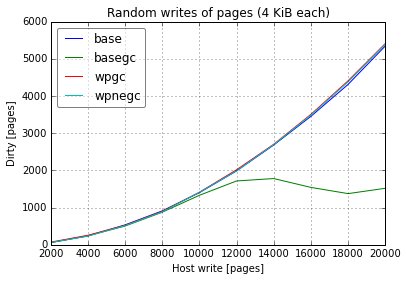

In [7]:
ah.plot_dirty_pages(sim_names, data)

## Write failures over written pages

This plot shows the number of failures (page not written due to disk errors) over the write requests.

All disks are able to fulfil the host requests, so it is confirmed that the **basegc** has bad performances, while the other disks are equally good (at least with this tiny sample of 20 K pages). 

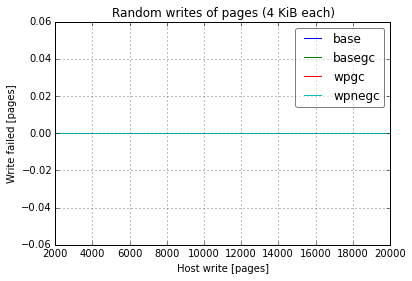

In [8]:
ah.plot_write_faiures(sim_names, data)

## Final Statistics

In [9]:
ah.generate_final_stats(sim_names, data)



base           Min            Max            Mean           
time           0.08004        0.79952        0.44 ± 0.24
iops           25000          25000          25,000.00 ± 0.00
bandwidth      97.66          97.66          97.66 ± 0.00
amplification  1.0            1.0            1.00 ± 0.00
host write     2001           19988          10,998.80 ± 6,052.07
host read      0              0              0.00 ± 0.00
disk write     2001           19988          10,998.80 ± 6,052.07
disk read      0              0              0.00 ± 0.00
block erased   0              0              0.00 ± 0.00
failures       0              0              0.00 ± 0.00
dirty pages    61             5339           2,091.30 ± 1,811.66


basegc         Min            Max            Mean           
time           0.08004        2.02596        0.75 ± 0.68
iops           23218          25000          24,307.80 ± 802.29
bandwidth      38.56          97.66          77.09 ± 25.10
amplification  1.0            1.68 

## Conclusions

Use this area for final remarks about the analysis.